# DmX Challenge: Predictive Credit Risk Modeling Using Customer Credit Scores and Phone Footprints


In [ ]:
# ──────────────────────────────────────────────────────────────────────────
# Script Name : training_etl_prev.py
# Author      : Dilan Castañeda, Paulo Ibarra, Bruno Díaz, Fatima Quintana
# Created On  : Octubre 03, 2024
# Last Update : Octubre 03, 2024
# Version     : 1.0.0
# Description : Credit risk modeling using bureau reports and phone data to predict client default probability.
#──────────────────────────────────────────────────────────────────────────

## Overview

---
Instituto Tecnológico y de Estudios Superiores de Monterrey

Analítica de datos y herramientas de inteligencia artificial TI3001C.103

Profesor: Enrique Ricardo García Hernández

Equipo 2:
*   Dilan González Castañeda             A00831905
*   Fátima Pamela Ramón Quintana         A00833076
*   Paulo Ibarra A01632632
*   Bruno Díaz Flores A0082455


---

**Overview**

Credit risk modeling using bureau reports and phone usage data to predict client default probability for loan approval decisions.

**Database Source**

The database for this project was provided by DMX, containing comprehensive credit bureau reports and detailed phone usage data for each client.

**Key Components**

1. Credit Bureau Data:

* Credit history
* Loan inquiries
* Payment behaviors
* Current debt levels


2. Phone Usage Data:

* Subscription type
* Usage patterns
* Payment history
* Device information


3.  Target Variable:

* Client default status (binary: defaulted or not)



**Project Goals**

Develop a predictive model to assess the likelihood of client loan default
Optimize loan approval decisions based on calculated risk
Enhance the overall loan portfolio quality by minimizing potential defaults

**Methodology**

* Utilize machine learning techniques to analyze historical data
* Incorporate both traditional credit metrics and alternative data (phone usage)
* Create a robust model that can handle various data types and complex relationships

**Expected Outcome**
A reliable credit risk assessment tool that can:

* Accurately predict client default probability
* Assist in making informed loan approval decisions
* Potentially increase approval rates for creditworthy clients while minimizing risk

This project aims to leverage the unique combination of traditional credit data and alternative phone usage data provided by DMX to create a more comprehensive and accurate credit risk assessment model.

### 1. ETL for Model Training

#### Purpose
- Prepare historical data for model development and training.

#### Process
1. **Extract**:
   - Pull historical data from DMX database (credit bureau reports and phone usage data).
   - Include all available features and the target variable (default status).

2. **Transform**:
   - Handle missing values, outliers, and data quality issues.
   - Perform feature engineering (e.g., creating interaction terms, deriving new features).
   - Encode categorical variables.
   - Normalize or standardize numerical features.

3. **Load**:
   - Store the processed data in a format suitable for model training (e.g., parquet files, a data warehouse).

#### Benefits
- Can perform extensive data cleaning and feature engineering.
- Allows for complex transformations that might be computationally expensive.
- Can use the full historical dataset for better feature creation and selection.

By implementing separate ETL processes for training and scoring, we can optimize our credit risk model for both comprehensive learning from historical data and efficient, consistent scoring of new records.

## ETL

### Extract

In [ ]:
%pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from typing import Dict, List
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# Define the path to the file
# Using the file inside the repository
file_name = r'C:\Users\dilan\Documents\Github\DataAnalysis_and_AI\period_2\Resources\Challenge\base_Reto.csv'
# Using the file from the repository
url = 'https://raw.githubusercontent.com/magotronico/DataAnalysis_and_AI/main/period_2/Resources/Challenge/base_Reto.csv'

# Load original DataBase (csv)
df = pd.read_csv(url, encoding='latin-1') # You can use the file_name variable to load the file if you have it in your local machine
df = pd.read_csv(url, encoding='latin-1')

# Display the first 3 rows of the dataframe
df.head(3)
# Display resume of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25101 entries, 0 to 25100
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Solicitud_id                             25101 non-null  float64
 1   Aprobado                                 25101 non-null  int64  
 2   Hit_Buro_Huella                          25101 non-null  int64  
 3   Malo                                     25101 non-null  int64  
 4   Num_IQ_U3M_PL_Financieras                25101 non-null  int64  
 5   Edad_cliente                             25101 non-null  int64  
 6   Porcentaje_cuentas_abiertas              25101 non-null  float64
 7   Num_IQ_U3M                               25101 non-null  int64  
 8   Num_IQ_U3M_TDC_Banco                     25101 non-null  int64  
 9   MaxMOP_U3M                               25101 non-null  int64  
 10  Saldo_actual_prest_personales            25101

In [ ]:
# List of unique values per column
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'nan', 'size'])

for column in df.columns:
    unique_values = [df[column].unique()]  # Ensure unique values are in a list
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [df[column].dtype], 'Unique Values': unique_values})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = df[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = df[column].count()

# Display the resulting dataframe
temp_df

,Column,dtype,Unique Values,nan,size
0,Solicitud_id,float64,"[1993059.0, 1993154.0, 1993230.0, 1993287.0, 1...",0,25101
1,Aprobado,int64,"[1, 0]",0,25101
2,Hit_Buro_Huella,int64,"[11, 10, 1, 0]",0,25101
3,Malo,int64,"[0, 1, -1]",0,25101
4,Num_IQ_U3M_PL_Financieras,int64,"[0, 1, 4, 2, -1, 3, 6, -2, 5, 7, 8, 10, 9, 18]",0,25101
5,Edad_cliente,int64,"[61, 67, 68, 64, 54, 63, 77, 40, 47, 72, 73, 4...",0,25101
6,Porcentaje_cuentas_abiertas,float64,"[0.3, 0.333333333, 0.073170732, 0.75, 0.147286...",0,25101
7,Num_IQ_U3M,int64,"[1, 3, 7, 12, 6, 5, 8, 4, 10, 18, 11, -1, 2, 0...",0,25101
8,Num_IQ_U3M_TDC_Banco,int64,"[0, 1, 2, -1, 5, 4, 3, -2, 6, 7]",0,25101
9,MaxMOP_U3M,int64,"[2, 9, 1, 7, -1, 0, 6, 3, 4, 5]",0,25101


### Transform


#### Estandarize column names

In [ ]:
#Create a copy of the original dataframe
df_copy = df.copy(deep=True)
# Estandarize columns names (lowercase and without accents)
df_copy.columns = [unidecode(str(col)).lower() for col in df.columns]
# Replace 'contabilidad' with 'contactabilidad' in column name
df_copy.columns = df_copy.columns.str.replace('contabilidad', 'contactabilidad')

#### Cleaning columns (variables)

In [ ]:
# Drop 'solicitud_id' column
df_copy.drop(columns=['solicitud_id'], inplace=True)

In [ ]:
# Clean entidad_federativa column
print(len(df_copy['entidad_federativa'].unique()))
print(df_copy['entidad_federativa'].value_counts().sort_index())

36
entidad_federativa
AGS      368
BCN      820
BCS      268
CAM      425
CDM      149
CDMX    1596
CHI     1663
CHS      491
COA     1593
COL      195
DGO      537
EM      2185
GRO      540
GTO      710
HGO      215
JAL     1070
MIC       37
MICH     550
MOR      445
NAY      269
NL      2303
OAX      458
PUE      796
QR       205
QRO      446
SIN     1061
SLP      399
SON     1419
TAB      229
TAM      884
TLA       14
TLAX     210
VER     1650
YUC      549
ZAC      216
Name: count, dtype: int64


In [ ]:
# Replace specific entidades with their standardized names
df_copy['entidad_federativa'] = df_copy['entidad_federativa'].replace({
    'CDM': 'CDMX',
    'MIC': 'MICH',
    'QR': 'QRO',
    'TLA': 'TLAX'
})

# Verify the replacements
print(len(df_copy['entidad_federativa'].unique()))
print(df_copy['entidad_federativa'].value_counts().sort_index())



32
entidad_federativa
AGS      368
BCN      820
BCS      268
CAM      425
CDMX    1745
CHI     1663
CHS      491
COA     1593
COL      195
DGO      537
EM      2185
GRO      540
GTO      710
HGO      215
JAL     1070
MICH     587
MOR      445
NAY      269
NL      2303
OAX      458
PUE      796
QRO      651
SIN     1061
SLP      399
SON     1419
TAB      229
TAM      884
TLAX     224
VER     1650
YUC      549
ZAC      216
Name: count, dtype: int64


In [ ]:
# Codification of the 'tipo_suscripcion' column
print(df_copy['tipo_suscripcion'].value_counts())

tipo_suscripcion
PREPAGO    13744
MIXTO       1625
POSPAGO     1575
      .      163
Name: count, dtype: int64


In [ ]:
# Replace non-valid values with np.nan
df_copy['tipo_suscripcion'] = df_copy['tipo_suscripcion'].apply(lambda x: x if x in ['PREPAGO', 'MIXTO', 'POSPAGO'] else np.nan)

# Final verification of the column
ordinal_encoder = OrdinalEncoder()
df_copy['tipo_suscripcion'] = ordinal_encoder.fit_transform(df_copy[['tipo_suscripcion']])
df_copy['tipo_suscripcion'] = df_copy['tipo_suscripcion']
print(df_copy['tipo_suscripcion'].value_counts()) # 3: PREPAGO, 2: MIXTO, 1: POSPAGO

tipo_suscripcion
2.0    13744
0.0     1625
1.0     1575
Name: count, dtype: int64


#### Categorize DB based on hit_buro_huella (ScoreCards)

In [ ]:
#  Split hit_buro_huella into hit_buro and hit_huella
df_copy['hit_buro_huella'] = df_copy['hit_buro_huella'].apply(lambda x: f'{x:02d}')
df_copy['hit_buro'] = df_copy['hit_buro_huella'].str[0].astype(int)
df_copy['hit_huella'] = df_copy['hit_buro_huella'].str[1].astype(int)
df_copy.insert(3, 'hit_buro', df_copy.pop('hit_buro'))
df_copy.insert(4, 'hit_huella', df_copy.pop('hit_huella'))
df_copy.drop('hit_buro_huella', axis=1, inplace=True)

# Grouping info by hit_buro and hit_huella into 4 categories: {1: 00, 2: 01, 3: 10, 4: 11}
df_copy['hit_group'] = df_copy['hit_buro'].astype(str) + df_copy['hit_huella'].astype(str)
df_copy['hit_group'] = df_copy['hit_group'].map({'00': 1, '01': 2, '10': 3, '11': 4})
df_copy.insert(4, 'hit_group', df_copy.pop('hit_group'))

# Drop 'hit_buro' and 'hit_huella' columns
df_copy.drop(columns=['hit_buro', 'hit_huella'], inplace=True)

<b>Create 4 DataFrame (1 per ScoreCard)</b>

In [ ]:
# Creating separate dataframes for each 'Hit_Buro_Huella' value
scorecard_1 = df_copy[df_copy['hit_group'] == 1].copy(deep=True)
scorecard_2 = df_copy[df_copy['hit_group'] == 2].copy(deep=True)
scorecard_3 = df_copy[df_copy['hit_group'] == 3].copy(deep=True)
scorecard_4 = df_copy[df_copy['hit_group'] == 4].copy(deep=True)

<b>Leave only the variables that can be used in each score card:</b>
1. Demographic
2. Demographic and footprint
3. Demographic and credit
4. Demographic, credit and footprint

In [ ]:
extra = [
    'aprobado',
    'malo',
    'hit_group'
]

demografica = [
    'edad_cliente',
    'entidad_federativa',
    'ingreso_bruto'
]

buro = [
    'num_iq_u3m_pl_financieras',
    'porcentaje_cuentas_abiertas',
    'num_iq_u3m',
    'num_iq_u3m_tdc_banco',
    'maxmop_u3m',
    'saldo_actual_prest_personales',
    'num_iq_u3m_prest_personales',
    'numero_ctas_atraso_prest_personales_u3m',
    'numero_ctas_atraso_tdc_u3m',
    'ctas_ab_u18m_tdc_banco',
    'num_ctas_prest_pers',
    'flag_prest_nomina',
    'meses_cta_mas_antig',
    'flag_fraude_prest_nomina',
    'flag_fraude_hipotecario',
    'flag_quebranto_prest_personal'
]

huella = [
    'tipo_suscripcion',
    'status',
    'antiguedad_uso_linea_celular',
    'gasto_mensual_telefonia',
    'actividad_usuario',
    'cambio_sim_u3m',
    'variable_37',
    'gasto_ultimos_60_dias',
    'score_fpd',
    'rango_dispositivo',
    'adopcion_tecno',
    'score_incumplimiento',
    'tasa_contactacion',
    'calidad_telefonica',
    'score_contactabilidad_entrante',
    'score_contactabilidad_saliente',
    'disciplina_tech',
    'cluster_sucursales'
]

# Print len of list
print(f'Extra: {len(extra)} columns')
print(f'Demografica: {len(demografica)} columns')
print(f'Buro: {len(buro)} columns')
print(f'Huella: {len(huella)} columns')

Extra: 3 columns
Demografica: 3 columns
Buro: 16 columns
Huella: 18 columns


In [ ]:
# Define the columns for each scorecard
scorecard_1_cols = extra + demografica
scorecard_2_cols = extra + demografica + huella
scorecard_3_cols = extra + demografica + buro
scorecard_4_cols = extra + demografica + buro + huella

# Function to keep only specified columns in a dataframe
def keep_columns(df, columns_to_keep):
    return df[df.columns.intersection(columns_to_keep)]

# Modify each scorecard dataframe
scorecard_1 = keep_columns(scorecard_1, scorecard_1_cols)
scorecard_2 = keep_columns(scorecard_2, scorecard_2_cols)
scorecard_3 = keep_columns(scorecard_3, scorecard_3_cols)
scorecard_4 = keep_columns(scorecard_4, scorecard_4_cols)

# Print the number of columns in each scorecard for verification
print(f"Scorecard 1 (Demographic): {scorecard_1.shape[1]} columns")
print(f"Scorecard 2 (Demographic and footprint): {scorecard_2.shape[1]} columns")
print(f"Scorecard 3 (Demographic and credit): {scorecard_3.shape[1]} columns")
print(f"Scorecard 4 (Demographic, credit and footprint): {scorecard_4.shape[1]} columns")

Scorecard 1 (Demographic): 6 columns
Scorecard 2 (Demographic and footprint): 24 columns
Scorecard 3 (Demographic and credit): 22 columns
Scorecard 4 (Demographic, credit and footprint): 40 columns


## Training Models

### Split raw database

* 75% train - 25% test

In [ ]:
apr_4 = df_copy[(df_copy['aprobado'] == 1) & (df_copy['hit_group'] == 4)]

y = apr_4['malo']
x = apr_4.drop(columns=['aprobado', 'hit_group']) # We do not drop 'malo' because it need to be used in the IV and KS calculations

In [ ]:
# Split dataset into training set and test set
# 75% training and 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [ ]:
# List of unique values per column
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'amnt_unique','nan', 'size'])

for column in x_train.columns:
    unique_values = [x_train[column].unique()]  # Ensure unique values are in a list
    amnt_unique = x_train[column].nunique()
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [x_train[column].dtype], 'Unique Values': unique_values, 'amnt_unique': amnt_unique})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = x_train[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = x_train[column].count()

# Display the resulting dataframe
temp_df

,Column,dtype,Unique Values,amnt_unique,nan,size
0,malo,int64,"[0, 1]",2,0,9539
1,num_iq_u3m_pl_financieras,int64,"[-2, 3, 0, 1, 2, 4, 6, 5, 7, 8]",10,0,9539
2,edad_cliente,int64,"[65, 63, 42, 62, 76, 67, 60, 53, 41, 70, 74, 6...",59,0,9539
3,porcentaje_cuentas_abiertas,float64,"[0.066666667, 0.555555556, 0.260869565, 0.6, 0...",886,0,9539
4,num_iq_u3m,int64,"[8, 4, 3, 1, 5, 12, 6, 2, 19, 7, 10, 14, 15, 9...",36,0,9539
5,num_iq_u3m_tdc_banco,int64,"[-2, 1, 2, 3, 0, 4, 5, 6]",8,0,9539
6,maxmop_u3m,int64,"[9, 2, 5, 6, 1, 3, 0, 7, 4, -1]",10,0,9539
7,saldo_actual_prest_personales,int64,"[249305, -2, 2097, 31524, 114711, 45700, 52249...",6564,0,9539
8,num_iq_u3m_prest_personales,int64,"[2, 1, -2, 4, 3, 5, 7, 6, 8, 0, 9, 10]",12,0,9539
9,ingreso_bruto,float64,"[16154.77, 3799.82, 3506.81, 5668.89, 3700.0, ...",7299,0,9539


### x_train treatment

#### Outliers correction

In [ ]:
# Agrupa por 'entidad_federativa' y calcula la tasa de morosidad
tasa_morosidad_por_entidad = apr_4.groupby('entidad_federativa')['malo'].apply(lambda x: x.sum() / x.count()).reset_index(name='tasa_morosidad')

# Formatea la columna 'tasa_morosidad' como porcentaje
tasa_morosidad_por_entidad['tasa_morosidad'] = tasa_morosidad_por_entidad['tasa_morosidad'].apply(lambda x: f'{x:.2%}')

# Muestra la tabla de tasas de morosidad por entidad federativa
print(tasa_morosidad_por_entidad)

   entidad_federativa tasa_morosidad
0                 AGS          7.81%
1                 BCN         19.65%
2                 BCS         17.22%
3                 CAM         20.70%
4                CDMX         20.94%
5                 CHI         16.77%
6                 CHS         20.69%
7                 COA         16.31%
8                 COL         11.76%
9                 DGO         17.81%
10                 EM         22.31%
11                GRO         13.62%
12                GTO         12.66%
13                HGO         22.11%
14                JAL         18.40%
15               MICH         11.46%
16                MOR         15.87%
17                NAY         20.25%
18                 NL         14.80%
19                OAX         13.01%
20                PUE         17.76%
21                QRO         12.18%
22                SIN         16.95%
23                SLP         14.81%
24                SON         17.32%
25                TAB         37.10%
2

In [ ]:
# Calcula la tasa de morosidad por entidad federativa
tasa_morosidad_por_entidad = apr_4.groupby('entidad_federativa')['malo'].apply(lambda x: x.sum() / x.count()).reset_index(name='tasa_morosidad')

# Calcula el porcentaje de información que representa cada entidad
porcentaje_informacion_por_entidad = apr_4['entidad_federativa'].value_counts(normalize=True).reset_index(name='porcentaje_informacion')
porcentaje_informacion_por_entidad.rename(columns={'index': 'entidad_federativa'}, inplace=True)

# Combina los dos DataFrames usando merge
tabla_combinada = pd.merge(tasa_morosidad_por_entidad, porcentaje_informacion_por_entidad, on='entidad_federativa')

# Formatea la columna 'tasa_morosidad' como porcentaje
tabla_combinada['tasa_morosidad'] = tabla_combinada['tasa_morosidad'].apply(lambda x: f'{x:.2%}')

# Formatea la columna 'porcentaje_informacion' como porcentaje
tabla_combinada['porcentaje_informacion'] = tabla_combinada['porcentaje_informacion'].apply(lambda x: f'{x:.2%}')

# ... (código anterior para calcular y combinar los DataFrames) ...

# Convierte 'tasa_morosidad' a números para ordenar
tabla_combinada['tasa_morosidad_num'] = tabla_combinada['tasa_morosidad'].str.rstrip('%').astype('float') / 100

# Ordena por 'tasa_morosidad_num'
tabla_combinada_ordenada = tabla_combinada.sort_values(by=['tasa_morosidad_num'], ascending=True)

# Formatea 'tasa_morosidad' como porcentaje nuevamente
tabla_combinada_ordenada['tasa_morosidad'] = tabla_combinada_ordenada['tasa_morosidad_num'].apply(lambda x: f'{x:.2%}')

# Elimina la columna temporal 'tasa_morosidad_num'
tabla_combinada_ordenada = tabla_combinada_ordenada.drop(columns=['tasa_morosidad_num'])

# Muestra la tabla combinada ordenada
print(tabla_combinada_ordenada)

   entidad_federativa tasa_morosidad porcentaje_informacion
0                 AGS          7.81%                  1.51%
15               MICH         11.46%                  2.74%
8                 COL         11.76%                  0.80%
26                TAM         11.90%                  3.77%
21                QRO         12.18%                  3.03%
12                GTO         12.66%                  2.42%
19                OAX         13.01%                  2.30%
11                GRO         13.62%                  2.54%
18                 NL         14.80%                  8.02%
23                SLP         14.81%                  1.70%
29                YUC         14.92%                  2.32%
30                ZAC         15.70%                  0.95%
16                MOR         15.87%                  1.49%
7                 COA         16.31%                  7.04%
5                 CHI         16.77%                  7.55%
22                SIN         16.95%    

In [ ]:
# Convierte 'tasa_morosidad' a números para ordenar
tabla_combinada['tasa_morosidad_num'] = tabla_combinada['tasa_morosidad'].str.rstrip('%').astype('float') / 100

# Ordena por 'tasa_morosidad_num'
tabla_combinada_ordenada = tabla_combinada.sort_values(by=['tasa_morosidad_num'], ascending=True)

# Formatea 'tasa_morosidad' como porcentaje nuevamente
tabla_combinada_ordenada['tasa_morosidad'] = tabla_combinada_ordenada['tasa_morosidad_num'].apply(lambda x: f'{x:.2%}')

# Convierte 'porcentaje_informacion' a números
tabla_combinada_ordenada['porcentaje_informacion_num'] = tabla_combinada_ordenada['porcentaje_informacion'].str.rstrip('%').astype('float') / 100


# Crea una columna 'grupo' y la inicializa con 0
tabla_combinada_ordenada['grupo'] = 0

# Define el tamaño de cada grupo (20% de la información total)
tamano_grupo = 0.20

# Variable para acumular el porcentaje de información
porcentaje_acumulado = 0

# Asigna los grupos
grupo_actual = 1
for index, row in tabla_combinada_ordenada.iterrows():
    porcentaje_acumulado += row['porcentaje_informacion_num']
    tabla_combinada_ordenada.loc[index, 'grupo'] = grupo_actual
    if porcentaje_acumulado >= tamano_grupo:
        grupo_actual += 1
        porcentaje_acumulado = 0

# Elimina la columna temporal 'tasa_morosidad_num' y 'porcentaje_informacion_num'
tabla_combinada_ordenada = tabla_combinada_ordenada.drop(columns=['tasa_morosidad_num', 'porcentaje_informacion_num'])


# Muestra la tabla con los grupos asignados
print(tabla_combinada_ordenada)

   entidad_federativa tasa_morosidad porcentaje_informacion  grupo
0                 AGS          7.81%                  1.51%      1
15               MICH         11.46%                  2.74%      1
8                 COL         11.76%                  0.80%      1
26                TAM         11.90%                  3.77%      1
21                QRO         12.18%                  3.03%      1
12                GTO         12.66%                  2.42%      1
19                OAX         13.01%                  2.30%      1
11                GRO         13.62%                  2.54%      1
18                 NL         14.80%                  8.02%      1
23                SLP         14.81%                  1.70%      2
29                YUC         14.92%                  2.32%      2
30                ZAC         15.70%                  0.95%      2
16                MOR         15.87%                  1.49%      2
7                 COA         16.31%                  7.04%   

In [ ]:
# Crear el diccionario
dic_entidad_grupos = {}

# Iterar por la tabla y agregar al diccionario
for index, row in tabla_combinada_ordenada.iterrows():
    grupo = f"Grupo {row['grupo']}"
    entidad = row['entidad_federativa']
    if grupo not in dic_entidad_grupos:
        dic_entidad_grupos[grupo] = {}  # Crear un diccionario interno para cada grupo
    dic_entidad_grupos[grupo][entidad] = row['grupo']  # Asignar la entidad y el número de grupo

# Imprimir el diccionario
print(dic_entidad_grupos)

{'Grupo 1': {'AGS': 1, 'MICH': 1, 'COL': 1, 'TAM': 1, 'QRO': 1, 'GTO': 1, 'OAX': 1, 'GRO': 1, 'NL': 1}, 'Grupo 2': {'SLP': 2, 'YUC': 2, 'ZAC': 2, 'MOR': 2, 'COA': 2, 'CHI': 2}, 'Grupo 3': {'SIN': 3, 'BCS': 3, 'TLAX': 3, 'SON': 3, 'PUE': 3, 'DGO': 3, 'JAL': 3}, 'Grupo 4': {'BCN': 4, 'NAY': 4, 'VER': 4, 'CHS': 4, 'CAM': 4, 'CDMX': 4}, 'Grupo 5': {'HGO': 5, 'EM': 5, 'TAB': 5}}


In [ ]:
grupos_porcentuales = dic_entidad_grupos

def asignar_grupo(estado):
  for grupo, valores in grupos_porcentuales.items():
    if estado in valores:
      return valores[estado]
  return None  # Valor por defecto si el estado no se encuentra en ningun grupo

In [ ]:
def outlier_correction(x: DataFrame, val_threshold: int = 11, tail_threshold: float = 0.05) -> DataFrame:
    """
    This function get to correct all outliers in non categorical numeric variables.

    **Parameters**

    val_threshold: *int* [default = 10] Amount of unique values before considered a variable categorical.
    tail_threshold: *float* [default = 0.05] Threshold for the tail of the distribution to be considered an outlier.
    df: *DataFrame* Dataframe to be corrected.

    **Returns**
    df_clean: *DataFrame* Dataframe with outliers corrected.

    """

    # Copy the dataframe to avoid modifying the original
    x_copy = x.copy(deep=True)

    # Loop through all columns to clean Outliers
    for column in x_copy.columns:
        # Check if the column is numeric
        if x_copy[column].dtype in ['int64', 'float64']:
            # Check if the column has more unique values than the threshold
            if x_copy[column].nunique() > val_threshold:
                # Calculate the quantiles
                q1 = x_copy[x_copy[column] > 0][column].quantile(tail_threshold)
                q3 = x_copy[x_copy[column] > 0][column].quantile(1 - tail_threshold)
                iqr = q3 - q1

                # Replace the outliers with the quantiles
                x_copy[column] = x_copy[column].apply(lambda x: x if x < 0 else q3 if x > q3 else q1 if x < q1 else x) # Upper bound only for natural distribution

        else:
            # If the column is not numeric, ignore it
            pass

    return x_copy

def bin_creation(x: DataFrame, max: float = 0.35, bin_size = 0.2, min: float = 0.05, val_threshold: int = 11) -> DataFrame:
    """
    This function creates bins for the numeric variables in the dataframe. It uses the TdM to merge bin of values <0 to bin with similar TdM if it is less than 5% of the total data.

    **Parameters**
    x: *DataFrame* Dataframe to be binned.
    max: *float* [default = 0.35] Maximum value for the bin size.
    bin_size: *float* [default = 0.2] Size of the bins.
    min: *float* [default = 0.05] Minimum value for the bin size.
    val_threshold: *int* [default = 10] Amount of unique values before considered a variable categorical.

    **Returns**
    x_copy: *DataFrame* Dataframe with the bins created.
    """


    # Copy the dataframe to avoid modifying the original
    x_copy = x.copy(deep=True)
    x_output = pd.DataFrame()

    # Loop through all columns to create bins
    for column in x_copy.columns:

        # Check if the column is numeric
        if x_copy[column].dtype in ['int64', 'float64'] and x_copy[column].nunique() > val_threshold:
            # print(f"Processing column {column}")
            bin_0 = x_copy[x_copy[column] < 0] # Bin for negative values
            bin_1 = x_copy[(x_copy[column] >= 0)] # df for positive values

            # Check if bin_0 is empty
            if bin_0.shape[0] == 0:
                # Create 5 bins with 20% percentiles for positive values
                bins, bin_labels = pd.qcut(bin_1[column], q=5, labels=False, retbins=True, duplicates="drop")

                # Create tags for the bins
                interval_labels = [f"({bin_labels[i]:.2f} - {bin_labels[i+1]:.2f})" for i in range(len(bin_labels)-1)]

                # Assign tag values with intervals, with no limits duplicated
                bin_1[column] = pd.cut(bin_1[column], bins=bin_labels, labels=interval_labels, right=False)

                x_output[column] = bin_1[column]
                x_output[column] = x_output[column].astype(str)

                # Label encode the bins
                ordinal_encoder = OrdinalEncoder()
                x_output[column] = ordinal_encoder.fit_transform(x_output[[column]])
                x_output[column] = x_output[column].astype(int)

            # Check if bin_0 is less than 5% of the total if so, merge it with the bin of positive values with similar TdM
            elif bin_0.shape[0] < min * x_copy.shape[0]:
                # print(f"Column {column} has less than {min * 100}% of the data in the negative bin")
                # Create 5 bins with 20% percentiles for positive values
                bins, bin_labels = pd.qcut(bin_1[column], q=5, labels=False, retbins=True, duplicates="drop")

                # Create tags for the bins
                interval_labels = [f"({bin_labels[i]:.2f} - {bin_labels[i+1]:.2f})" for i in range(len(bin_labels)-1)]

                # Assign tag values with intervals, with no limits duplicated
                bin_1[column] = pd.cut(bin_1[column], bins=bin_labels, labels=interval_labels, right=False)

                # Calculate the TdM for each bin
                TdM_0 = bin_0['malo'].mean() if not bin_0.empty else None
                TdM_1 = bin_1.groupby(column, observed=False)['malo'].mean().to_dict()

                # If TdM_0 is None, skip further processing for this column
                if TdM_0 is None:
                    continue

                # Add bin_0 to the bin from bin_1 with the most similar TdM
                distances = {k: abs(v - TdM_0) for k, v in TdM_1.items()}
                min_distance = 99999
                for key, value in distances.items():
                    if value < min_distance:
                        min_distance = value
                        closest_bin = key

                # Assign the bin label to the value
                bin_0[column] = closest_bin
                x_output[column] = pd.concat([bin_0[column], bin_1[column]], axis=0)

                # Ensure the column is formatted as string
                x_output[column] = x_output[column].astype(str)

                # Label encode the bins
                ordinal_encoder = OrdinalEncoder()
                x_output[column] = ordinal_encoder.fit_transform(x_output[[column]])
                x_output[column] = x_output[column].astype(int)

            # Check if bin_0 is more than 5% of the total if so, create bins for both positive and negative values
            elif bin_0.shape[0] > min * x_copy.shape[0]:
                # print(f"Column {column} has been binned with {len(x_output[column].unique())} bins")
                # Create 5 bins with 20% percentiles for positive values
                bins, bin_labels = pd.qcut(bin_1[column], q=5, labels=False, retbins=True, duplicates="drop")

                # Create tags for the bins
                interval_labels = [f"({bin_labels[i]:.2f} - {bin_labels[i+1]:.2f})" for i in range(len(bin_labels)-1)]

                # Assign tag values with intervals, with no limits duplicated
                bin_1[column] = pd.cut(bin_1[column], bins=bin_labels, labels=interval_labels, right=False)

                bin_0_bins, bin_0_labels = pd.qcut(bin_0[column], q=1, labels=False, retbins=True, duplicates="drop")
                bin_0_interval_labels = [f"({bin_0_labels[i]:.2f} - {bin_0_labels[i+1]:.2f})" for i in range(len(bin_0_labels)-1)]
                bin_0[column] = pd.cut(bin_0[column], bins=bin_0_labels, labels=bin_0_interval_labels, right=False)

                x_output[column] = pd.concat([bin_0[column], bin_1[column]], axis=0)
                x_output[column] = x_output[column].astype(str)

                # Label encode the bins
                ordinal_encoder = OrdinalEncoder()
                x_output[column] = ordinal_encoder.fit_transform(x_output[[column]])
                x_output[column] = x_output[column].astype(int)

        # If the column has only 2 unique values, it is considered binary
        elif x_copy[column].nunique() == 2:
                x_output[column] = x_copy[column]
                x_output[column] = x_output[column].astype(int)

        # For categorical variables that are already label encoded
        elif x_copy[column].dtype in ['int64', 'float64'] and x_copy[column].nunique() <= val_threshold:
            # Create bins with 20% percentiles
            bins, bin_labels = pd.qcut(x_copy[column], q=5, labels=False, retbins=True, duplicates="drop")

            # Create tags for the bins
            interval_labels = [f"({bin_labels[i]:.2f} - {bin_labels[i+1]:.2f})" for i in range(len(bin_labels)-1)]

            # Assign tag values with intervals, with no limits duplicated
            x_copy[column] = pd.cut(x_copy[column], bins=bin_labels, labels=interval_labels, right=False)

            while True:
                # Get bin counts as a percentage of total
                bin_counts = x_copy[column].value_counts(normalize=True)

                # Identify bins below the threshold
                small_bins = bin_counts[bin_counts < min].index

                # If there are no bins smaller than the threshold, exit the loop
                if len(small_bins) == 0:
                    break

                for small_bin in small_bins:
                    bin_index = interval_labels.index(small_bin)

                    if bin_index == 0:
                        # Merge with the next bin if it's the first bin
                        next_bin = interval_labels[bin_index + 1]
                        x_copy[column] = x_copy[column].replace(small_bin, next_bin)

                    elif bin_index == len(interval_labels) - 1:
                        # Merge with the previous bin if it's the last bin
                        prev_bin = interval_labels[bin_index - 1]
                        x_copy[column] = x_copy[column].replace(small_bin, prev_bin)

                    else:
                        # Merge with the nearest bin with more than 5% of the data
                        prev_bin = interval_labels[bin_index - 1]
                        next_bin = interval_labels[bin_index + 1]

                        # Choose the bin with more than 5%, or the larger bin if both are <5%
                        if bin_counts[prev_bin] >= bin_counts[next_bin]:
                            x_copy[column] = x_copy[column].replace(small_bin, prev_bin)
                        else:
                            x_copy[column] = x_copy[column].replace(small_bin, next_bin)

                # Update interval labels after merging
                interval_labels = x_copy[column].unique()

            # Label encode the bins
            x_output[column] = x_copy[column].astype(str)
            ordinal_encoder = OrdinalEncoder()
            x_output[column] = ordinal_encoder.fit_transform(x_output[[column]])
            x_output[column] = x_output[column].astype(int)

        else:
            if column == 'entidad_federativa':
                x_output[column] = x_copy[column].apply(asignar_grupo)
                x_output[column] = x_output[column].astype(int)
            elif column == 'tipo_suscripcion':
                x_output[column] = x_copy[column].astype(int)
            # print(f"Column {column} is not numeric ({x_copy[column].dtype}) or has less than {val_threshold} unique values ({x_copy[column].nunique()})")

    return x_output

def merge_low_freq_labels(df, threshold=0.05):
    # For each column in the dataframe
    for col in df.columns:
        # Get the frequency distribution of the column
        freq = df[col].value_counts(normalize=True)

        # Identify labels with a frequency below the threshold
        low_freq_labels = freq[freq < threshold].index

        # Replace each low-frequency label
        for label in low_freq_labels:
            # Get sorted unique values of the column
            unique_vals = sorted(df[col].unique())
            # Find index of the low-frequency label in the unique values
            idx = unique_vals.index(label)

            # Find the nearest label: if possible, use the previous or next value
            if idx == 0:  # If the label is the first one, use the next
                nearest_label = unique_vals[idx + 1]
            elif idx == len(unique_vals) - 1:  # If the label is the last one, use the previous
                nearest_label = unique_vals[idx - 1]
            else:
                # Compare the distance between the previous and next labels
                prev_label = unique_vals[idx - 1]
                next_label = unique_vals[idx + 1]

                # Assign to the closest label
                nearest_label = prev_label if abs(prev_label - label) <= abs(next_label - label) else next_label

            # Replace low frequency label with the nearest label
            df[col].replace(label, nearest_label, inplace=True)

    return df

# Apply the outlier_correction function to the training set
x_train_clean = outlier_correction(x_train)
x_train_bins = bin_creation(x_train_clean)
x_train_bins = merge_low_freq_labels(x_train_bins)
x_train_clean['entidad_federativa'] = x_train['entidad_federativa'].apply(asignar_grupo).astype(int)
x_train_bins.info()

<ipython-input-24-e5d324caf8df>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_1[column] = pd.cut(bin_1[column], bins=bin_labels, labels=interval_labels, right=False)
<ipython-input-24-e5d324caf8df>:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_0[column] = closest_bin
<ipython-input-24-e5d324caf8df>:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<class 'pandas.core.frame.DataFrame'>
Index: 9539 entries, 12289 to 5488
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   malo                                     9539 non-null   int64
 1   num_iq_u3m_pl_financieras                9539 non-null   int64
 2   edad_cliente                             9539 non-null   int64
 3   porcentaje_cuentas_abiertas              9539 non-null   int64
 4   num_iq_u3m                               9539 non-null   int64
 5   num_iq_u3m_tdc_banco                     9539 non-null   int64
 6   maxmop_u3m                               9539 non-null   int64
 7   saldo_actual_prest_personales            9539 non-null   int64
 8   num_iq_u3m_prest_personales              9539 non-null   int64
 9   ingreso_bruto                            9539 non-null   int64
 10  numero_ctas_atraso_prest_personales_u3m  9539 non-null   int64
 11  numer

#### IV and KS indicators

In [ ]:
# Define helper functions for IV and KS calculations
def calculate_iv_ks(df, target_column, variable):

    # Create a temporary DataFrame to calculate Malos and Buenos
    df = df[df['malo'] >= 0]  # Remove rows with negative values in 'malo'
    grouped = df.groupby(variable, observed=False).agg(
        buenos=('malo', lambda x: (x == 0).sum()),
        malos=('malo', lambda x: (x == 1).sum()),
        count=('malo', 'size')  # Count of rows in each bin
    )

    # Total Buenos, Malos, and Total count of rows
    total_buenos = grouped['buenos'].sum()
    total_malos = grouped['malos'].sum()
    total_count = grouped['count'].sum()

    # Morosity rate for each bin
    grouped['morosity_rate'] = grouped['malos'] / grouped['count']

    # Calculating %B, %M, and % of data for each bin
    grouped['%B'] = grouped['buenos'] / total_buenos
    grouped['%M'] = grouped['malos'] / total_malos
    grouped['%data'] = grouped['count'] / total_count  # Percentage of data in each bin

    # Cumulative sums for KS calculation
    grouped['acumB'] = grouped['%B'].cumsum()
    grouped['acumM'] = grouped['%M'].cumsum()

    # IV Calculation
    grouped['prevIV'] = ((grouped['%B'] - grouped['%M']) *
                         np.log((grouped['%B'] + 0.001) / (grouped['%M'] + 0.001)))
    iv = grouped['prevIV'].sum()

    # KS Calculation
    grouped['prevKS'] = abs(grouped['acumB'] - grouped['acumM'])
    ks = grouped['prevKS'].max()

    # Classifications
    iv_classification = classify_iv(iv)
    ks_classification = classify_ks(ks)

    # Check if any bin has less than 5% of the data
    below_5_percent = (grouped['%data'] < 0.05).any()
    if below_5_percent:
        print(f"\033[93mWarning: Some bins for variable '{variable}' contain less than 5% of the data.\033[0m")

    # Print the temporary DataFrame to see intermediate calculations
    print(f"\nIntermediate calculations for variable: {variable}")
    print(tabulate(grouped, headers='keys', tablefmt='psql'))

    return iv, iv_classification, ks, ks_classification

def classify_iv(iv):
    if iv <= 0.02:
        return 'No predice'
    elif 0.02 < iv <= 0.1:
        return 'Bajo'
    elif 0.1 < iv <= 0.3:
        return 'Moderado'
    else:
        return 'Fuerte'

def classify_ks(ks):
    if ks <= 0.2:
        return 'Pobre'
    elif 0.2 < ks <= 0.3:
        return 'Aceptable'
    elif 0.3 < ks <= 0.4:
        return 'Buena'
    else:
        return 'Muy buena'

# Main function to compute IV and KS for all scorecards
def compute_scorecard_metrics(scorecards):
    results = []
    for scorecard_num, df in enumerate(scorecards, 1):
        print(f"\033[92m\nProcessing Scorecard {scorecard_num}...\033[0m")
        # Extract columns based on the three categories: demographic, credit, and footprint
        demographic_vars = [col for col in df.columns if col in demografica]
        credit_vars = [col for col in df.columns if col in buro]
        footprint_vars = [col for col in df.columns if col in huella]

        # Combine all variables into a list
        all_variables = [(var, 'demographic') for var in demographic_vars] + \
                        [(var, 'buro') for var in credit_vars] + \
                        [(var, 'huella') for var in footprint_vars]

        # Create a DataFrame to store the final results for this scorecard
        scorecard_results = []

        # Compute IV and KS for each variable
        for variable, topic in all_variables:
            iv, iv_classification, ks, ks_classification = calculate_iv_ks(df, 'malo', variable)
            scorecard_results.append([topic, variable, iv, iv_classification, ks, ks_classification])

        # Convert results to DataFrame and append to final results list
        scorecard_df = pd.DataFrame(scorecard_results, columns=['topic', 'variable', 'IV', 'IV_classification', 'KS', 'KS_classification'])
        results.append((scorecard_num, scorecard_df))

    return results

# List of scorecards to analyze
scorecards = [x_train_bins]

# Compute IV and KS for all scorecards
iv_ks_results = compute_scorecard_metrics(scorecards)

# Display the results
for scorecard_num, df in iv_ks_results:
    print(f"\n\033[1mScorecard {scorecard_num} IV and KS Results\033[0m")
    print(tabulate(df, headers='keys', tablefmt='psql'))



Processing Scorecard 1...

Intermediate calculations for variable: edad_cliente
+----------------+----------+---------+---------+-----------------+-----------+-----------+-----------+----------+----------+------------+-----------+
|   edad_cliente |   buenos |   malos |   count |   morosity_rate |        %B |        %M |     %data |    acumB |    acumM |     prevIV |    prevKS |
|----------------+----------+---------+---------+-----------------+-----------+-----------+-----------+----------+----------+------------+-----------|
|              0 |     1280 |     444 |    1724 |        0.257541 | 0.161841  | 0.272393  | 0.180732  | 0.161841 | 0.272393 | 0.0572807  | 0.110552  |
|              1 |     1247 |     297 |    1544 |        0.192358 | 0.157668  | 0.182209  | 0.161862  | 0.319509 | 0.454601 | 0.00352907 | 0.135092  |
|              2 |     1894 |     340 |    2234 |        0.152193 | 0.239474  | 0.208589  | 0.234196  | 0.558983 | 0.66319  | 0.00424558 | 0.104207  |
|            

#### Features selection

['edad_cliente', 'entidad_federativa', 'num_iq_u3m_pl_financieras', 'porcentaje_cuentas_abiertas', 'num_iq_u3m', 'num_iq_u3m_tdc_banco', 'maxmop_u3m', 'saldo_actual_prest_personales', 'num_iq_u3m_prest_personales', 'numero_ctas_atraso_prest_personales_u3m', 'numero_ctas_atraso_tdc_u3m', 'ctas_ab_u18m_tdc_banco', 'num_ctas_prest_pers', 'flag_prest_nomina', 'meses_cta_mas_antig', 'flag_fraude_prest_nomina', 'flag_fraude_hipotecario', 'flag_quebranto_prest_personal', 'tipo_suscripcion', 'status', 'antiguedad_uso_linea_celular', 'actividad_usuario', 'cambio_sim_u3m', 'variable_37', 'gasto_ultimos_60_dias', 'score_fpd', 'rango_dispositivo', 'adopcion_tecno', 'score_incumplimiento', 'tasa_contactacion', 'calidad_telefonica', 'score_contactabilidad_entrante', 'score_contactabilidad_saliente', 'cluster_sucursales']


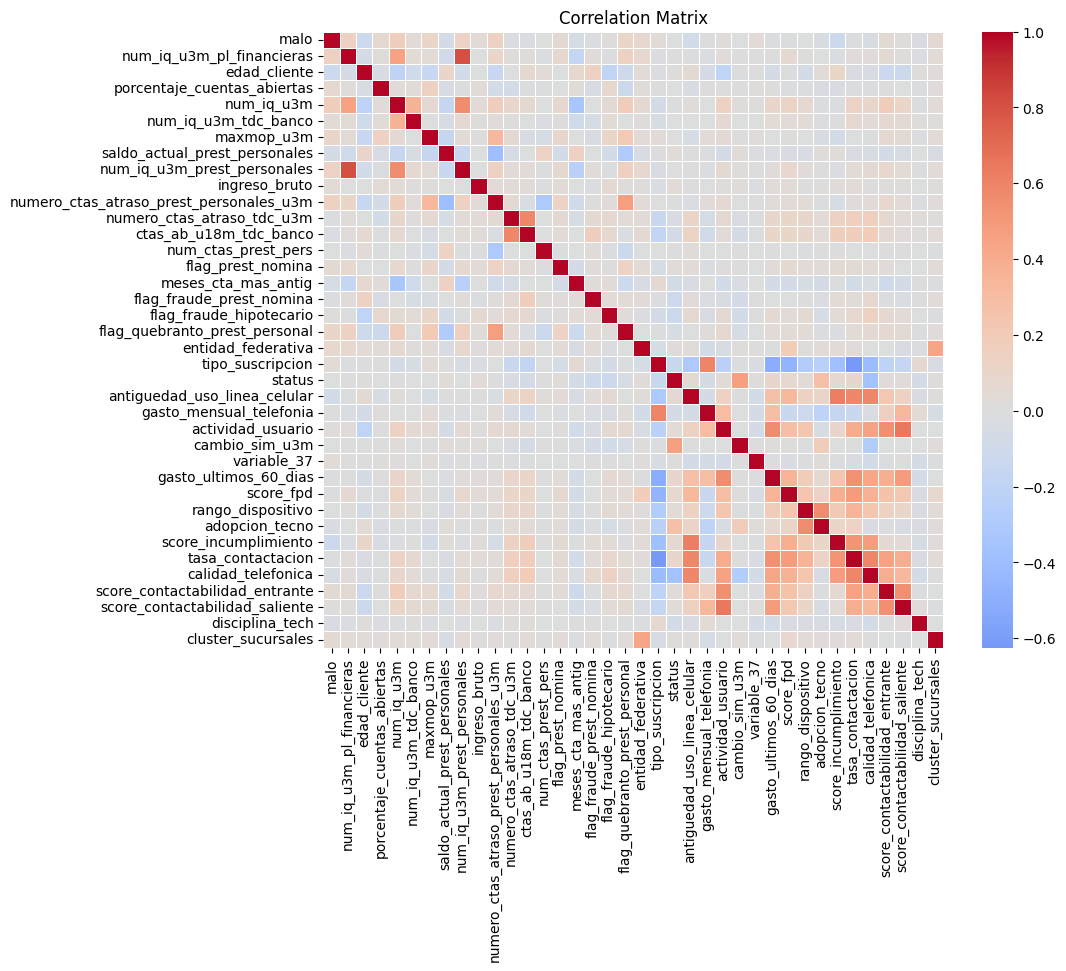

In [ ]:
def feature_selection(iv_ks_results: Dict[int, DataFrame], real_data: Dict[int, DataFrame], corr_threshold: float = 0.6) -> Dict[int, List]:
    """
    This function gets the features that are going to be used in the model. In case there are 2 or more correlated variables (where the abs(corr) >= 0.6), only the one with the highest IV and KS is going to be selected (priority on KS).

    **Parameters**

    iv_ks_df: *DataFrame* Dataframe with the IV and KS for each variable.
    corr_threshold: *float* [default = 0.6] Threshold for the correlation to be considered high.

    **Returns**

    features: *Dict[int, List]* Dictionary with the features selected for the model.
    """

    result = {}

    for scorecard_num, iv_ks_df in iv_ks_results:  # Loop through list of tuples
        # Get the corresponding real dataframe with variables
        real_df = real_data[scorecard_num]

        # Step 1: Calculate the correlation matrix for the numerical columns in the real dataframe
        corr_matrix = real_df.corr()

        # Step 2: Find pairs of variables with correlation > 0.6
        correlated_pairs = [(i, j) for i in range(len(corr_matrix))
                            for j in range(i + 1, len(corr_matrix))
                            if corr_matrix.iloc[i, j] > 0.6]

        # Step 3: Make a deep copy of iv_ks_df to filter variables
        filtered_variables = iv_ks_df.copy().reset_index(drop=True)

        # Now loop through the correlated pairs and remove variables as needed
        drop_indices = set()  # To keep track of indices to drop

        for i, j in correlated_pairs:
            # Only proceed if both i and j are still present
            if i in drop_indices or j in drop_indices:
                continue

            var_i = filtered_variables.iloc[i]
            var_j = filtered_variables.iloc[j]

            # Compare based on IV classification first, then KS
            if var_i['IV_classification'] == var_j['IV_classification']:
                if var_i['KS'] > var_j['KS']:
                    drop_indices.add(j)
                else:
                    drop_indices.add(i)
            elif var_i['IV_classification'] > var_j['IV_classification']:
                drop_indices.add(j)
            else:
                drop_indices.add(i)

        # Step 4: Drop the correlated variables based on indices collected
        filtered_variables = filtered_variables.drop(list(drop_indices)).reset_index(drop=True)

        # Step 5: Store the remaining independent variables
        result[scorecard_num] = filtered_variables['variable'].tolist()

    return result

features = feature_selection(iv_ks_results, {1: x_train_bins})
features = features[1]
print(features)

corr_matrix = x_train_bins.corr(numeric_only=True)
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

### Decision Tree No bins

Accuracy: 0.5614255765199161

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.54      0.67      1999
           1       0.22      0.70      0.34       386

    accuracy                           0.56      2385
   macro avg       0.56      0.62      0.51      2385
weighted avg       0.79      0.56      0.62      2385



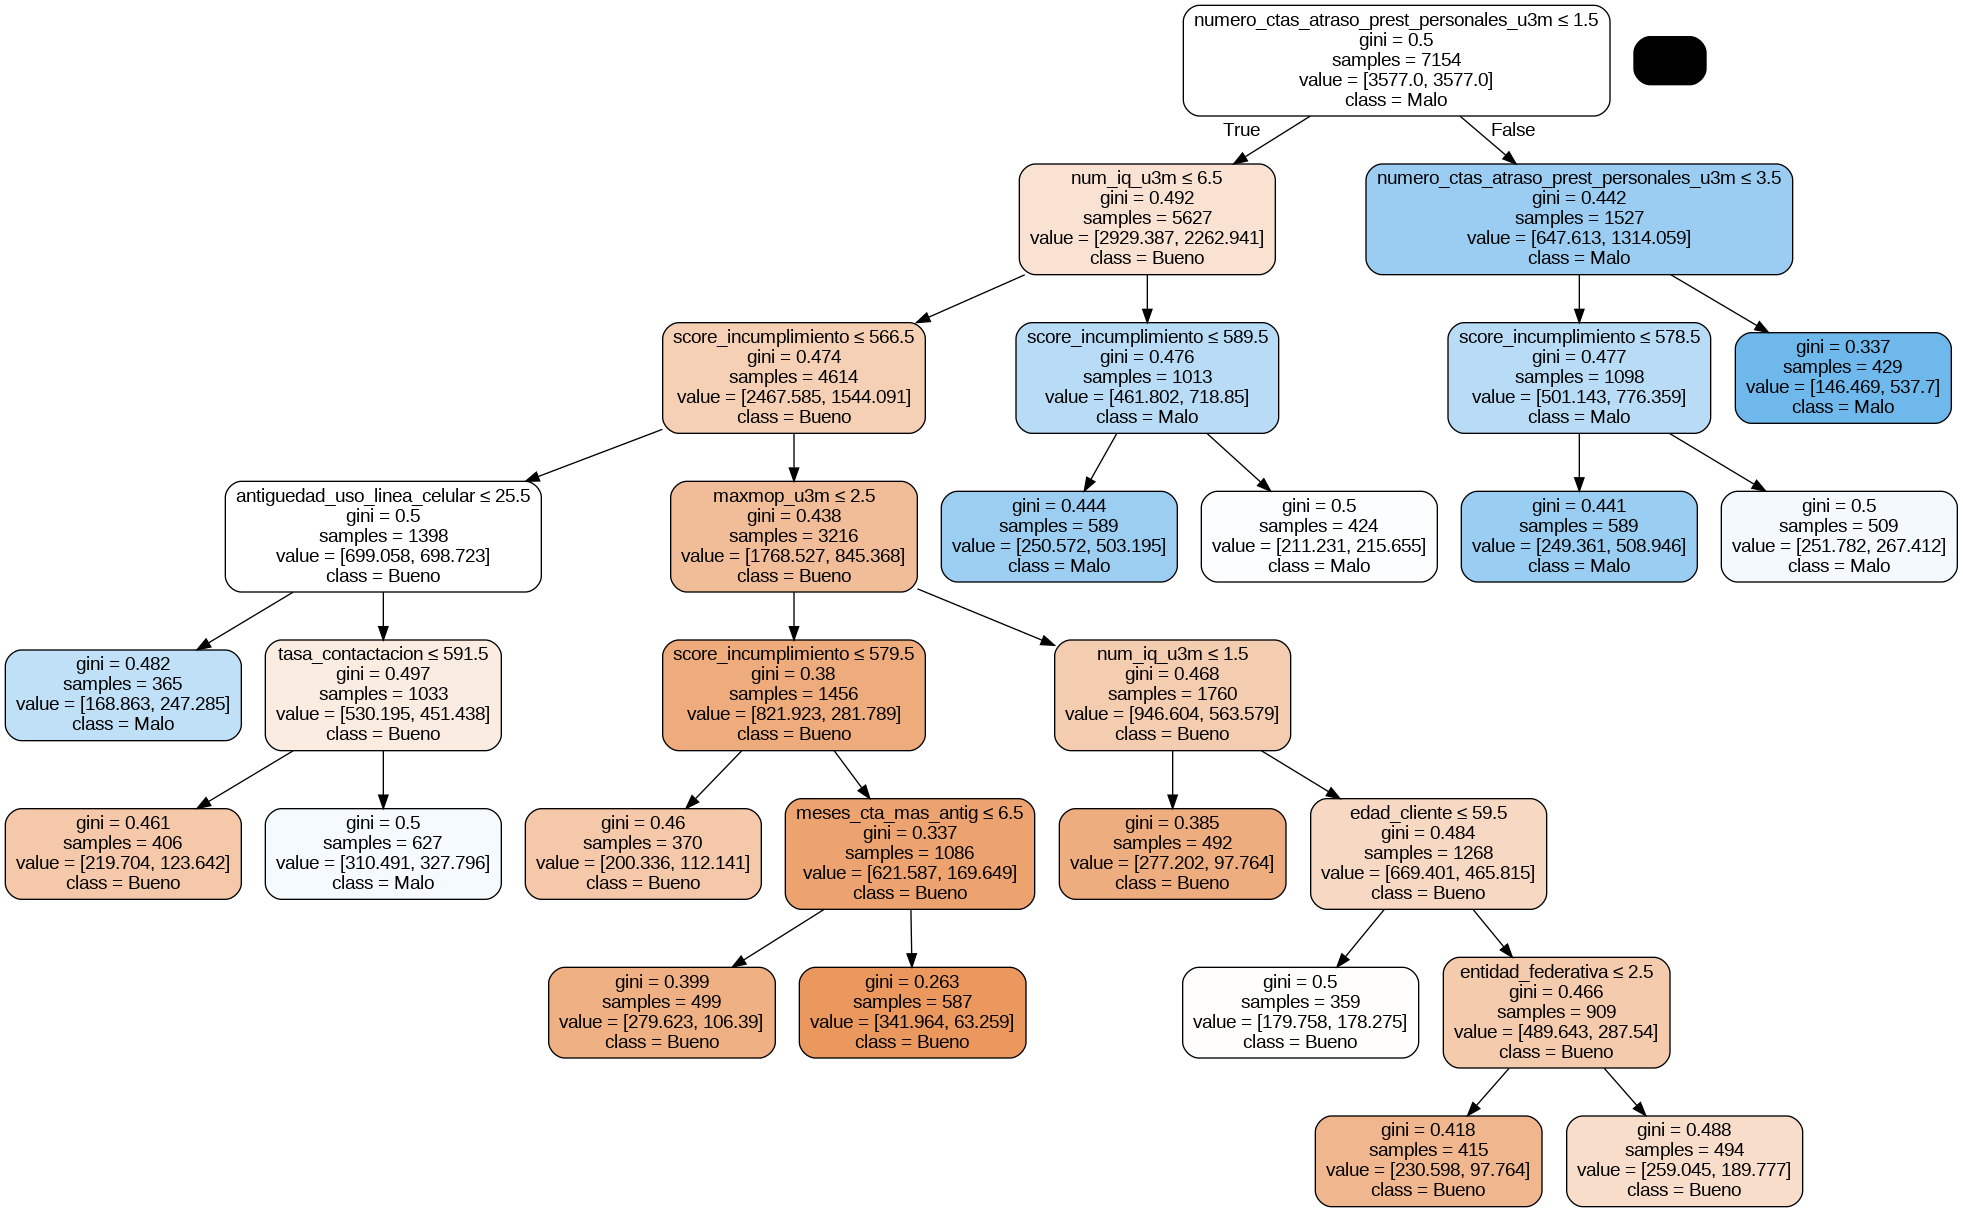

In [ ]:

# Definir las features y la variable objetivo
X = x_train_clean[features]
y = x_train_clean['malo']

# Dividir el dataset en conjunto de entrenamiento y prueba (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Crear el clasificador de árbol de decisión con ajustes
clf = DecisionTreeClassifier(
    min_samples_leaf=max(int(0.05 * len(X_train)), 50),  # Mínimo 5% de las observaciones o 50
    class_weight='balanced',  # Manejo de clases desbalanceadas
    random_state=1
)

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, zero_division=1)
print("\nReporte de Clasificación:")
print(report)

# Visualizar el árbol de decisión
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=features,
                class_names=['Bueno', 'Malo'])

# Convertir los datos a un gráfico con pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Guardar el gráfico en un archivo y mostrar la imagen
graph.write_png('arbol_mejorado.png')
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir las características (features) y la variable objetivo (y) desde x_train_clean
X = x_train_clean[features]  # Seleccionar las columnas de características
y = x_train_clean['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador de árbol de decisión con la semilla fija
decision_tree = DecisionTreeClassifier(random_state=123)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini', 'entropy'],  # Criterio de evaluación
    'class_weight': [None, 'balanced'],  # Manejo de clases desbalanceadas
}

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary = results[['param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'param_class_weight', 'mean_test_score']]

# Ordenar por la métrica de precisión en el conjunto de prueba
results_summary = results_summary.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el accuracy
print("\nTabla resumen de combinaciones de hiperparámetros y accuracy en Cross Validation:")
print(results_summary)


Tabla resumen de combinaciones de hiperparámetros y accuracy en Cross Validation:
    param_max_depth  param_min_samples_leaf param_criterion  \
0                 3                     357            gini   
9                 4                     357         entropy   
15               10                     357         entropy   
14                9                     357         entropy   
13                8                     357         entropy   
12                7                     357         entropy   
11                6                     357         entropy   
10                5                     357         entropy   
8                 3                     357         entropy   
7                10                     357            gini   
6                 9                     357            gini   
5                 8                     357            gini   
4                 7                     357            gini   
3                 6                

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import pandas as pd

# Definir las características (features) y la variable objetivo (y) desde x_train_clean

X = x_train_clean[features]  # Seleccionar las columnas de características
y = x_train_clean['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador Random Forest con la semilla fija
random_forest = RandomForestClassifier(random_state=123, class_weight='balanced')

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [4, 6, 8, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini'],  # Criterio de evaluación
}

# Definir el scorer basado en f1-score o recall para maximizar el poder de discriminación
scorer = make_scorer(f1_score, pos_label=1)

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring=scorer, return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary_rf = results_rf[['param_n_estimators', 'param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'mean_test_score']]

# Ordenar por la métrica de f1-score en el conjunto de prueba
results_summary_rf = results_summary_rf.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el f1-score
print("\nTabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation con Random Forest:")
print(results_summary_rf)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Tabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation con Random Forest:
    param_n_estimators  param_max_depth  param_min_samples_leaf  \
0                   50                4                     357   
6                   50                8                     357   
9                   50               10                     357   
3                   50                6                     357   
5                  200                6                     357   
8                  200                8                     357   
11                 200               10                     357   
1                  100                4                     357   
2                  200                4                     357   
4                  100                6                     357   
7                  100                8                     357   
10                 100               10                     357   

   param_criterion  mean_te

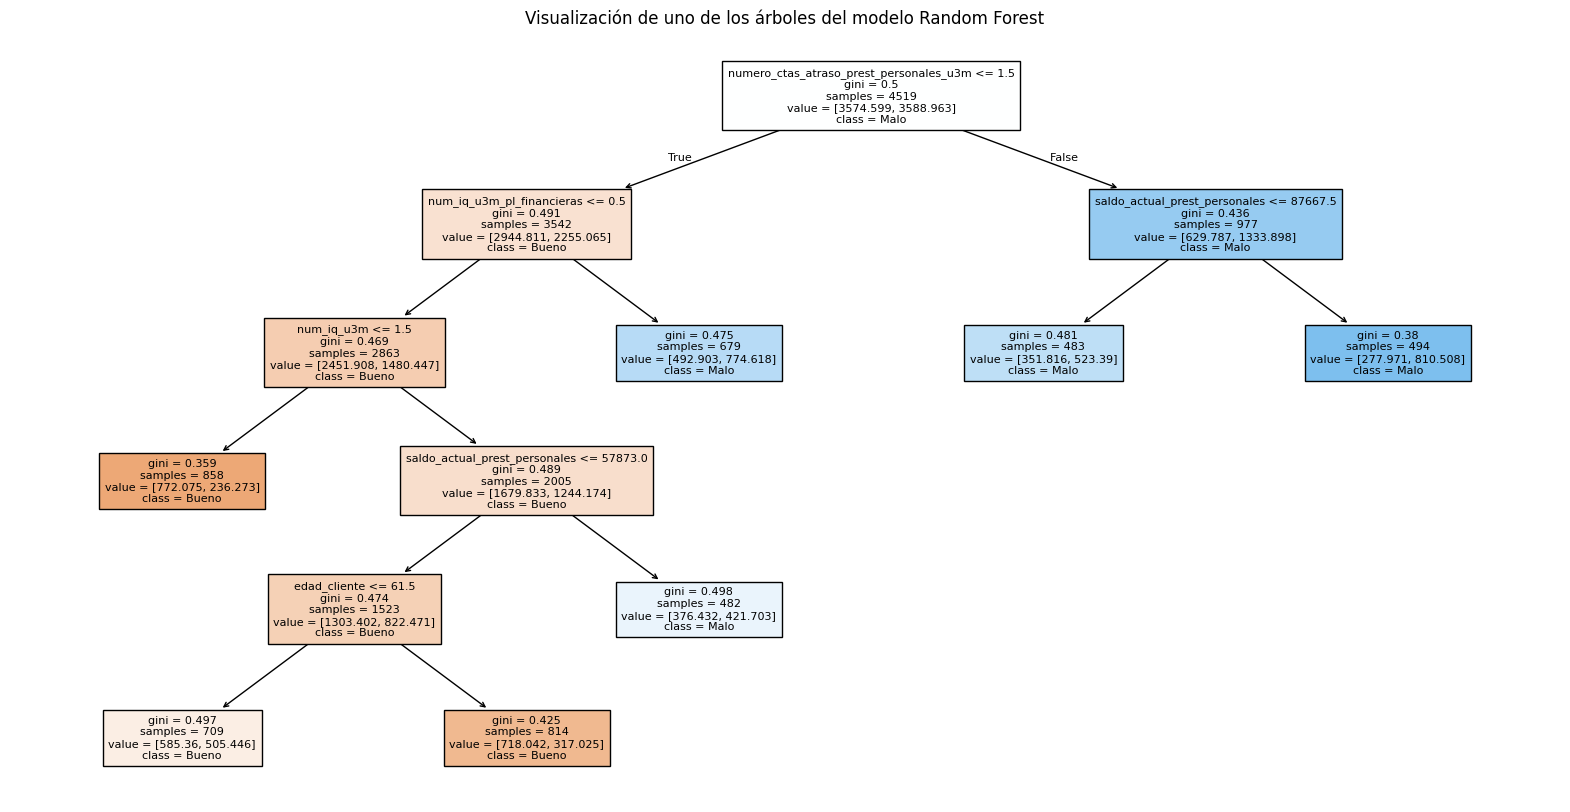

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Definir las características (features) y la variable objetivo (y) desde x_train_clean

X = x_train_clean[features]  # Seleccionar las columnas de características
y = x_train_clean['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Entrenar el modelo Random Forest con los mejores hiperparámetros encontrados previamente
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=476,  # Se ajusta al 5% de la población de entrenamiento
    criterion='gini',
    class_weight='balanced',
    random_state=123
)

# Entrenar el modelo en los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Graficar uno de los árboles del Random Forest (para visualizarlo)
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Bueno', 'Malo'], fontsize=8)
plt.title("Visualización de uno de los árboles del modelo Random Forest")
plt.show()

#### Confusion matrix

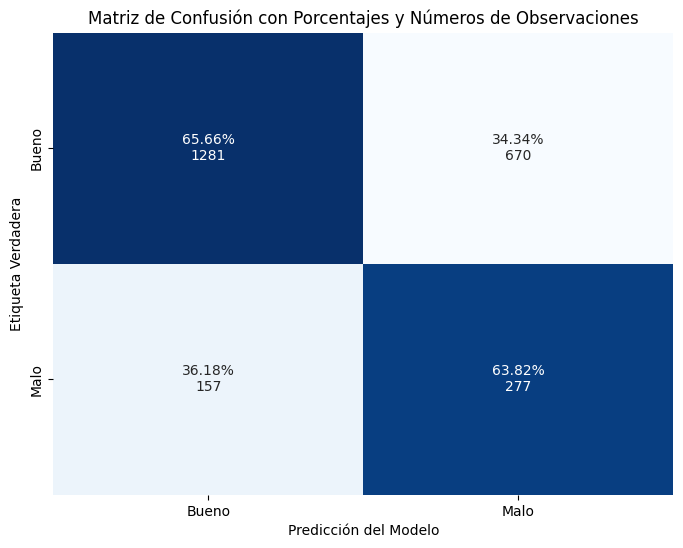

El accuracy del modelo Random Forest en el conjunto de prueba es: 65.32%


In [ ]:
# Importar las librerías necesarias para generar la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hacer predicciones con el modelo Random Forest entrenado
y_pred = best_rf_model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión, incluyendo tanto los porcentajes como el número de observaciones
cm_with_counts = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cm_with_counts[i, j] = f"{cm_percentage[i, j]:.2%}\n{cm[i, j]}"

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=cm_with_counts, fmt='', cmap='Blues', cbar=False, xticklabels=['Bueno', 'Malo'], yticklabels=['Bueno', 'Malo'])
plt.title("Matriz de Confusión con Porcentajes y Números de Observaciones")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Predicción del Modelo')
plt.show()

# Calcular el accuracy del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el resultado
print(f"El accuracy del modelo Random Forest en el conjunto de prueba es: {accuracy * 100:.2f}%")

### Logistic Regresion

In [ ]:
# Importar las librerías necesarias para la regresión logística y el escalado
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir las características (features) y la variable objetivo (y) desde x_train_clean

X = x_train_clean[features]  # Seleccionar las columnas de características
y = x_train_clean['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Escalar los datos para mejorar la convergencia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de regresión logística con un mayor número de iteraciones
logistic_regression = LogisticRegression(random_state=123, class_weight='balanced', max_iter=10000, solver='lbfgs')

# Entrenar el modelo de regresión logística con los datos de entrenamiento escalados
logistic_regression.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo en los datos de prueba escalados
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Calcular el accuracy del modelo de regresión logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Mostrar el resultado del accuracy
print(f"El accuracy del modelo de Regresión Logística en el conjunto de prueba es: {accuracy_logistic * 100:.2f}%")

El accuracy del modelo de Regresión Logística en el conjunto de prueba es: 67.38%


####  Confussion Matrix

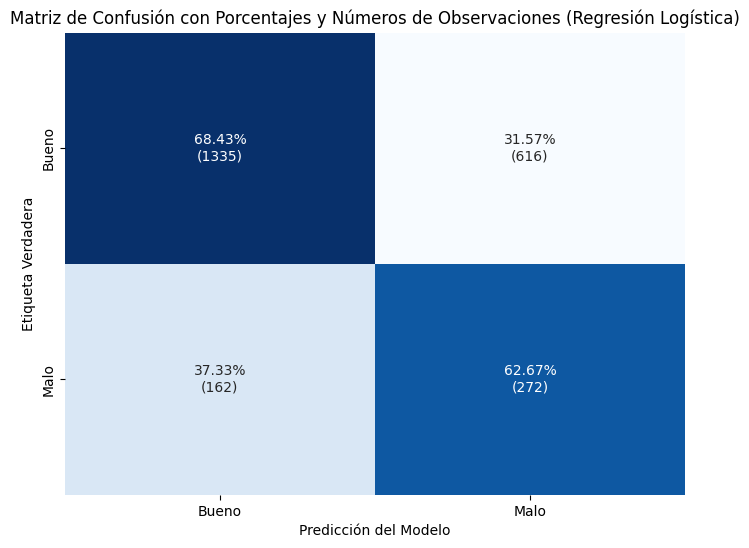

In [ ]:
# Generar la matriz de confusión con los datos de prueba
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage = cm_logistic.astype('float') / cm_logistic.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión, incluyendo tanto los porcentajes como el número de observaciones
cm_with_counts = np.empty_like(cm_logistic, dtype=object)
for i in range(cm_logistic.shape[0]):
    for j in range(cm_logistic.shape[1]):
        cm_with_counts[i, j] = f"{cm_percentage[i, j]:.2%}\n({cm_logistic[i, j]})"

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=cm_with_counts, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Bueno', 'Malo'], yticklabels=['Bueno', 'Malo'])
plt.title("Matriz de Confusión con Porcentajes y Números de Observaciones (Regresión Logística)")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Predicción del Modelo')
plt.show()

In [ ]:
# Importar las librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Definir una función para verificar si la diagonal principal cumple con el criterio >= 60%
def check_diagonal_60(cm):
    bueno_bueno = cm[0, 0] / cm[0].sum()  # Bueno (Verdadero) y Bueno (Predicho)
    malo_malo = cm[1, 1] / cm[1].sum()    # Malo (Verdadero) y Malo (Predicho)
    return bueno_bueno >= 0.60 and malo_malo >= 0.60

# Definir el modelo de regresión logística
logistic_regression = LogisticRegression(random_state=123, class_weight='balanced', max_iter=5000)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controla la regularización
    'solver': ['lbfgs', 'liblinear'],  # Solvers a probar
}

# Definir la búsqueda en cuadrícula con validación cruzada
grid_search_logistic = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_logistic.fit(X_train_scaled, y_train)

# Obtener el mejor modelo encontrado
best_logistic_model = grid_search_logistic.best_estimator_

# Probar diferentes umbrales de decisión para encontrar uno que satisfaga el criterio >=60%
optimal_threshold = 0.5
y_pred_proba = best_logistic_model.predict_proba(X_test_scaled)[:, 1]  # Predicciones probabilísticas

for threshold in np.arange(0.3, 0.7, 0.01):  # Probar desde 0.3 a 0.7 con saltos de 0.01
    # Ajustar el umbral de decisión
    y_pred_logistic_tuned = np.where(y_pred_proba >= threshold, 1, 0)

    # Generar la matriz de confusión
    cm_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)

    # Verificar si la diagonal principal cumple con el criterio >=60%
    if check_diagonal_60(cm_logistic_tuned):
        optimal_threshold = threshold
        break

# Calcular la matriz de confusión final con el umbral óptimo
y_pred_final = np.where(y_pred_proba >= optimal_threshold, 1, 0)
cm_final = confusion_matrix(y_test, y_pred_final)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage_final = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión final
cm_with_counts_final = pd.DataFrame(index=['Bueno (Verdadero)', 'Malo (Verdadero)'],
                                    columns=['Bueno (Predicho)', 'Malo (Predicho)'])

# Rellenar la matriz con porcentajes y números de observaciones
for i in range(cm_final.shape[0]):
    for j in range(cm_final.shape[1]):
        cm_with_counts_final.iloc[i, j] = f"{cm_percentage_final[i, j]:.2%} ({cm_final[i, j]})"

# Mostrar la matriz de confusión final
print("\nMatriz de Confusión final ajustada con umbral óptimo:")
print(cm_with_counts_final)

# Mostrar el umbral óptimo encontrado y los mejores hiperparámetros
print(f"\nUmbral óptimo encontrado: {optimal_threshold}")
print(f"Mejores hiperparámetros encontrados: {grid_search_logistic.best_params_}")


Matriz de Confusión final ajustada con umbral óptimo:
                  Bueno (Predicho) Malo (Predicho)
Bueno (Verdadero)    60.43% (1179)    39.57% (772)
Malo (Verdadero)      29.49% (128)    70.51% (306)

Umbral óptimo encontrado: 0.46000000000000013
Mejores hiperparámetros encontrados: {'C': 1, 'solver': 'liblinear'}


### Decision Tree with bins

Accuracy: 0.6046121593291405

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      1999
           1       0.24      0.64      0.34       386

    accuracy                           0.60      2385
   macro avg       0.57      0.62      0.53      2385
weighted avg       0.79      0.60      0.66      2385



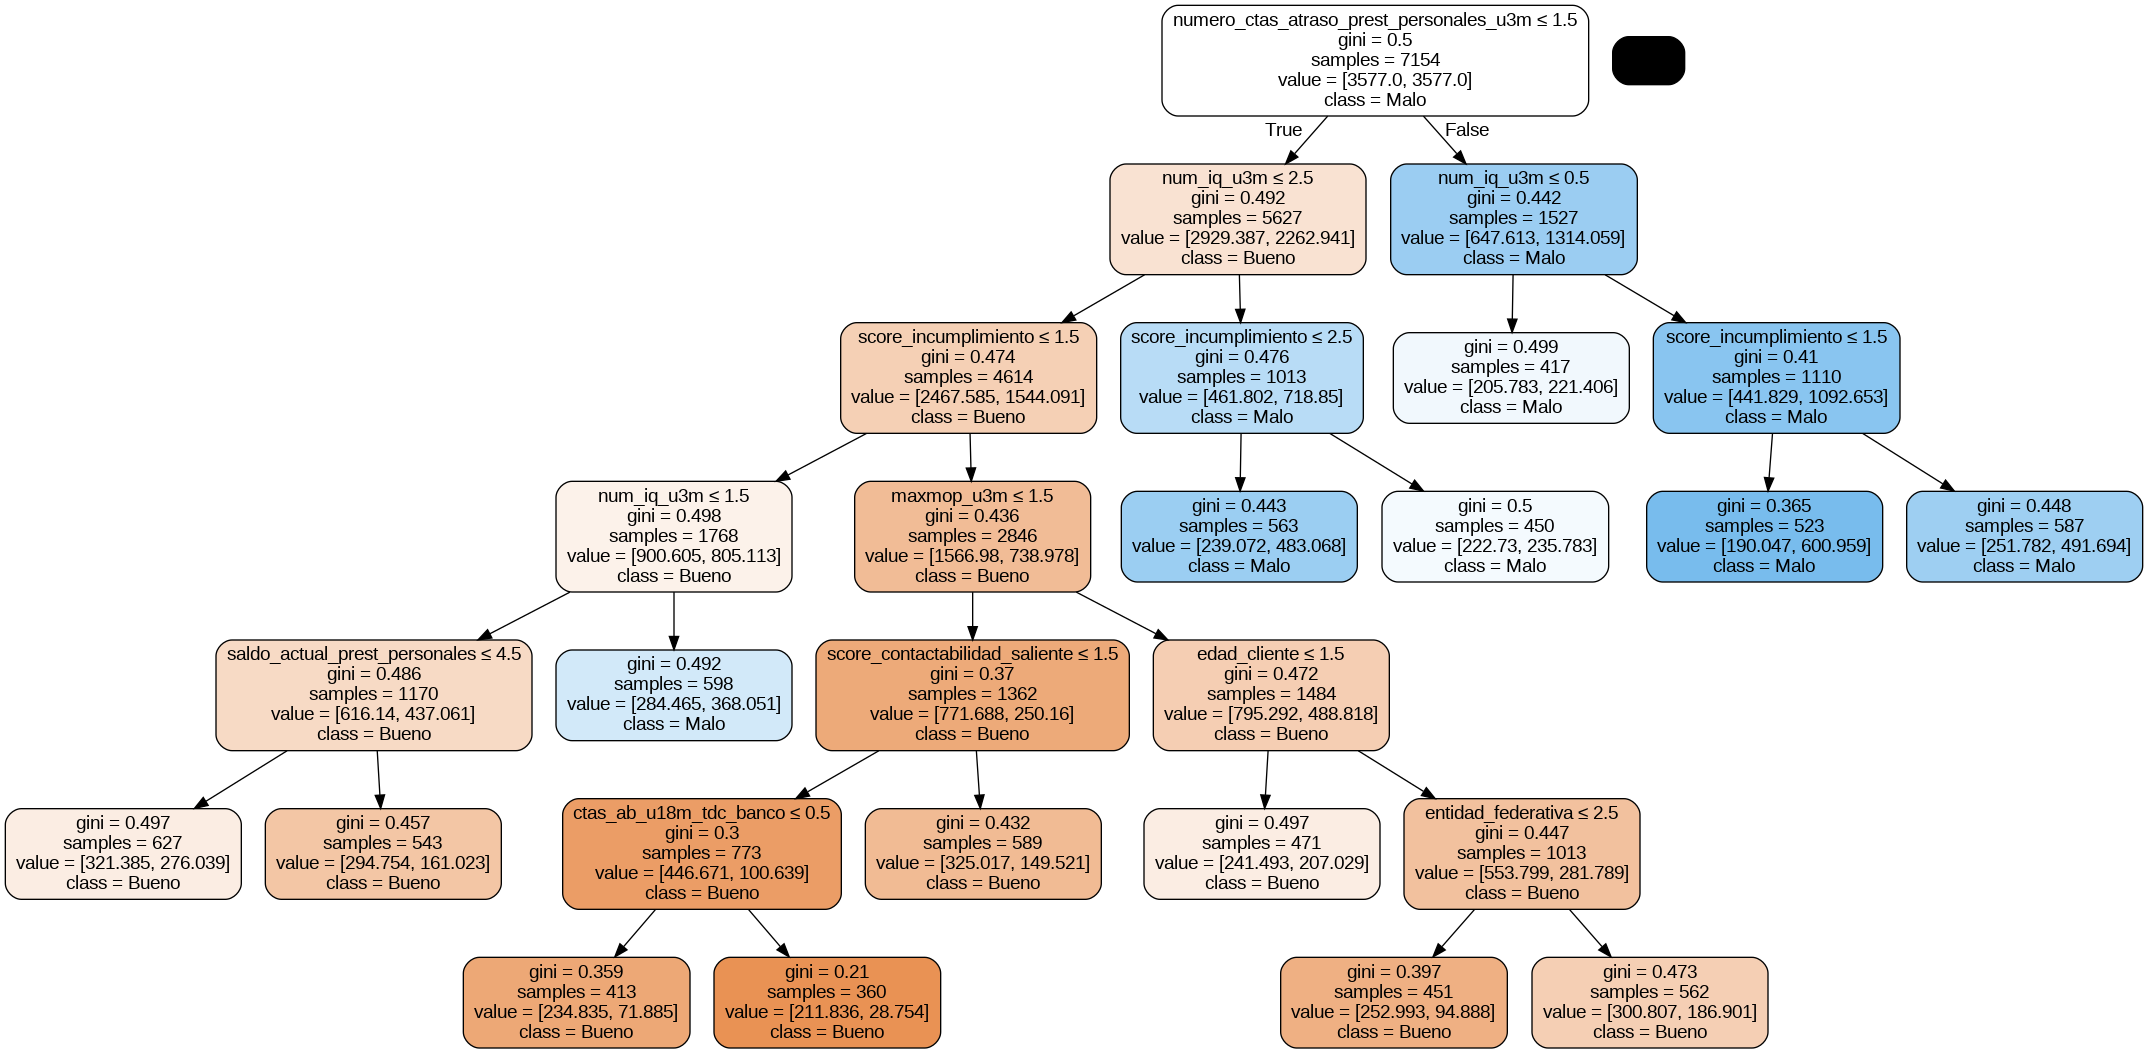

In [ ]:
# Definir las features y la variable objetivo

X = x_train_bins[features]
y = x_train_bins['malo']

# Dividir el dataset en conjunto de entrenamiento y prueba (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Crear el clasificador de árbol de decisión con ajustes
clf = DecisionTreeClassifier(
    min_samples_leaf=max(int(0.05 * len(X_train)), 50),  # Mínimo 5% de las observaciones o 50
    class_weight='balanced',  # Manejo de clases desbalanceadas
    random_state=1
)

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, zero_division=1)
print("\nReporte de Clasificación:")
print(report)

# Visualizar el árbol de decisión
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=features,
                class_names=['Bueno', 'Malo'])

# Convertir los datos a un gráfico con pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Guardar el gráfico en un archivo y mostrar la imagen
graph.write_png('arbol_mejorado.png')
Image(graph.create_png())

In [ ]:
# Definir las características (features) y la variable objetivo (y) desde x_train_bins

X = x_train_bins[features]  # Seleccionar las columnas de características
y = x_train_bins['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador de árbol de decisión con la semilla fija
decision_tree = DecisionTreeClassifier(random_state=123)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini', 'entropy'],  # Criterio de evaluación
    'class_weight': [None, 'balanced'],  # Manejo de clases desbalanceadas
}

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary = results[['param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'param_class_weight', 'mean_test_score']]

# Ordenar por la métrica de precisión en el conjunto de prueba
results_summary = results_summary.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el accuracy
print("\nTabla resumen de combinaciones de hiperparámetros y accuracy en Cross Validation:")
print(results_summary)


Tabla resumen de combinaciones de hiperparámetros y accuracy en Cross Validation:
    param_max_depth  param_min_samples_leaf param_criterion  \
0                 3                     357            gini   
9                 4                     357         entropy   
15               10                     357         entropy   
14                9                     357         entropy   
13                8                     357         entropy   
12                7                     357         entropy   
11                6                     357         entropy   
10                5                     357         entropy   
8                 3                     357         entropy   
7                10                     357            gini   
6                 9                     357            gini   
5                 8                     357            gini   
4                 7                     357            gini   
3                 6                

In [ ]:
# Definir las características (features) y la variable objetivo (y) desde x_train_bins

X = x_train_bins[features]  # Seleccionar las columnas de características
y = x_train_bins['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Definir el valor mínimo de la hoja como el entero del 5% de la población de entrenamiento
min_samples_leaf = int(0.05 * len(X_train))

# Definir el clasificador Random Forest con la semilla fija
random_forest = RandomForestClassifier(random_state=123, class_weight='balanced')

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [4, 6, 8, 10],  # Profundidades a probar
    'min_samples_leaf': [min_samples_leaf],  # Valor mínimo fijo de la hoja
    'criterion': ['gini'],  # Criterio de evaluación
}

# Definir el scorer basado en f1-score o recall para maximizar el poder de discriminación
scorer = make_scorer(f1_score, pos_label=1)

# Definir la búsqueda en cuadrícula (GridSearchCV) con validación cruzada
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring=scorer, return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Obtener los resultados en un DataFrame
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Seleccionar las columnas relevantes para el resumen
results_summary_rf = results_rf[['param_n_estimators', 'param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'mean_test_score']]

# Ordenar por la métrica de f1-score en el conjunto de prueba
results_summary_rf = results_summary_rf.sort_values(by='mean_test_score', ascending=False)

# Mostrar la tabla resumen con las combinaciones de hiperparámetros y el f1-score
print("\nTabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation con Random Forest:")
print(results_summary_rf)


Tabla resumen de combinaciones de hiperparámetros y f1-score en Cross Validation con Random Forest:
    param_n_estimators  param_max_depth  param_min_samples_leaf  \
5                  200                6                     357   
8                  200                8                     357   
11                 200               10                     357   
4                  100                6                     357   
7                  100                8                     357   
10                 100               10                     357   
3                   50                6                     357   
6                   50                8                     357   
9                   50               10                     357   
1                  100                4                     357   
2                  200                4                     357   
0                   50                4                     357   

   param_criterion  mean_te

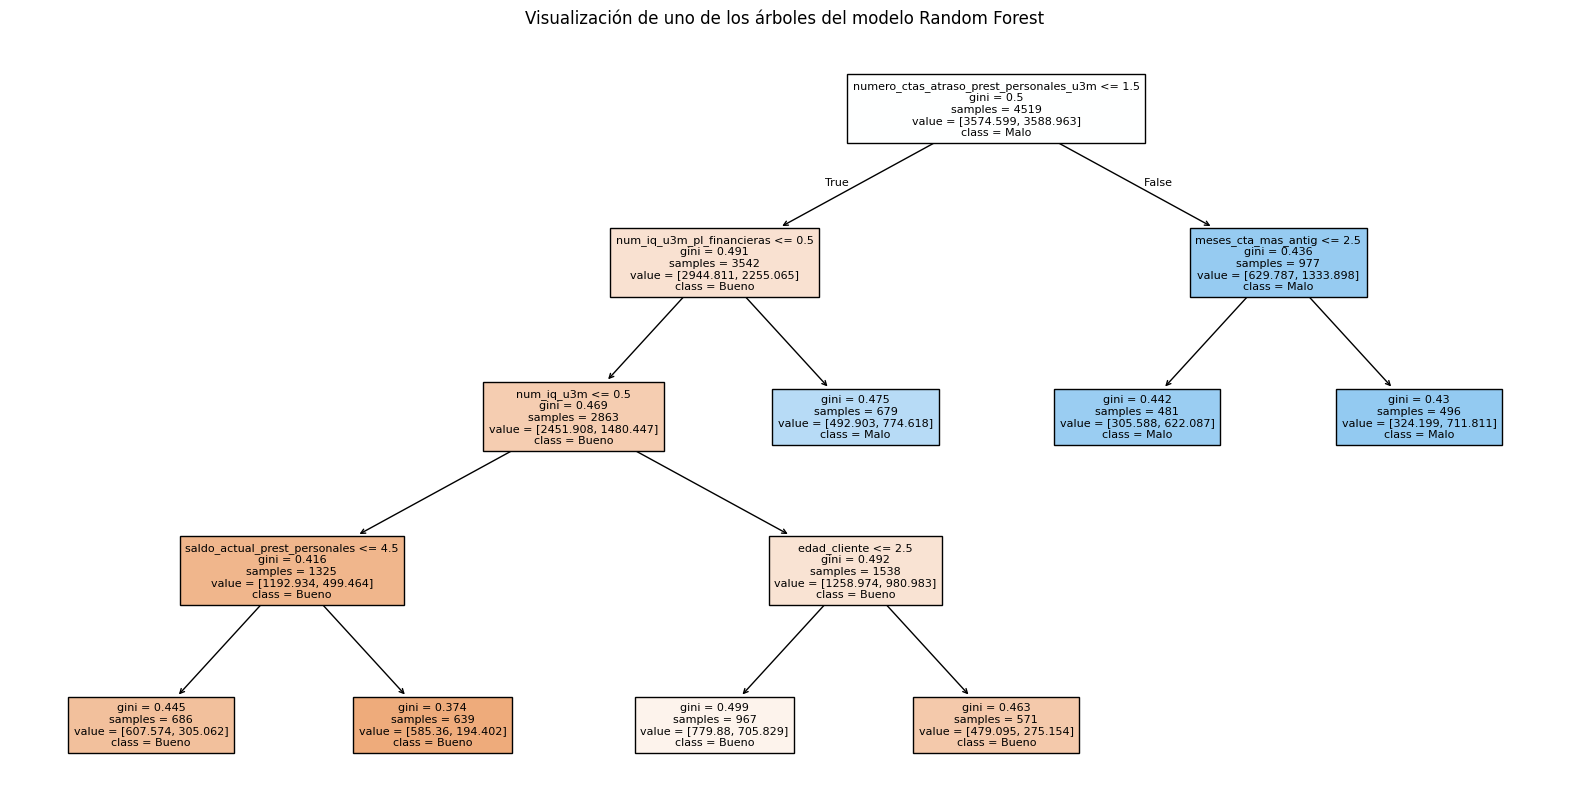

In [ ]:
# Definir las características (features) y la variable objetivo (y) desde x_train_bins

X = x_train_bins[features]  # Seleccionar las columnas de características
y = x_train_bins['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Entrenar el modelo Random Forest con los mejores hiperparámetros encontrados previamente
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=476,  # Se ajusta al 5% de la población de entrenamiento
    criterion='gini',
    class_weight='balanced',
    random_state=123
)

# Entrenar el modelo en los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Graficar uno de los árboles del Random Forest (para visualizarlo)
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Bueno', 'Malo'], fontsize=8)
plt.title("Visualización de uno de los árboles del modelo Random Forest")
plt.show()

### Confussion Matrix

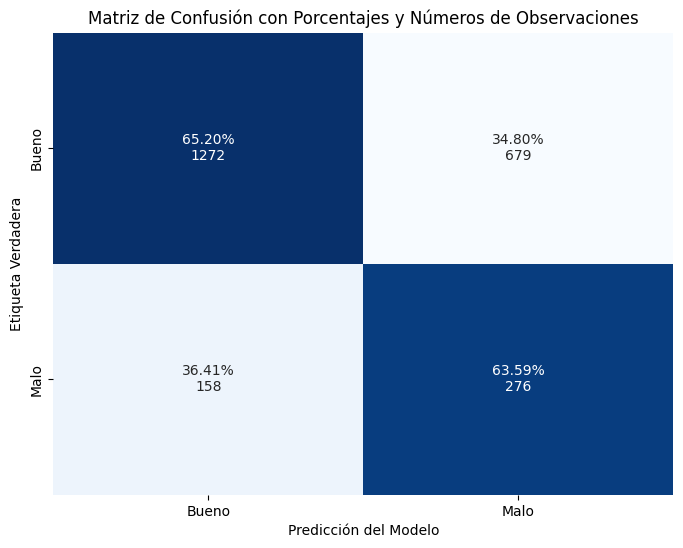

El accuracy del modelo Random Forest en el conjunto de prueba es: 64.91%


In [ ]:
# Hacer predicciones con el modelo Random Forest entrenado
y_pred = best_rf_model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión, incluyendo tanto los porcentajes como el número de observaciones
cm_with_counts = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cm_with_counts[i, j] = f"{cm_percentage[i, j]:.2%}\n{cm[i, j]}"

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=cm_with_counts, fmt='', cmap='Blues', cbar=False, xticklabels=['Bueno', 'Malo'], yticklabels=['Bueno', 'Malo'])
plt.title("Matriz de Confusión con Porcentajes y Números de Observaciones")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Predicción del Modelo')
plt.show()

# Calcular el accuracy del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el resultado
print(f"El accuracy del modelo Random Forest en el conjunto de prueba es: {accuracy * 100:.2f}%")

### Logistic Regresion

In [ ]:
# Definir las características (features) y la variable objetivo (y) desde x_train_bins

X = x_train_bins[features]  # Seleccionar las columnas de características
y = x_train_bins['malo']  # La variable objetivo es 'malo'

# Dividir los datos en conjunto de entrenamiento (75%) y prueba (25%) con la semilla fija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Escalar los datos para mejorar la convergencia
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de regresión logística con un mayor número de iteraciones
logistic_regression = LogisticRegression(random_state=123, class_weight='balanced', max_iter=10000, solver='lbfgs')

# Entrenar el modelo de regresión logística con los datos de entrenamiento escalados
logistic_regression.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo en los datos de prueba escalados
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Calcular el accuracy del modelo de regresión logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Mostrar el resultado del accuracy
print(f"El accuracy del modelo de Regresión Logística en el conjunto de prueba es: {accuracy_logistic * 100:.2f}%")

El accuracy del modelo de Regresión Logística en el conjunto de prueba es: 65.74%


#### Confussion Matrix

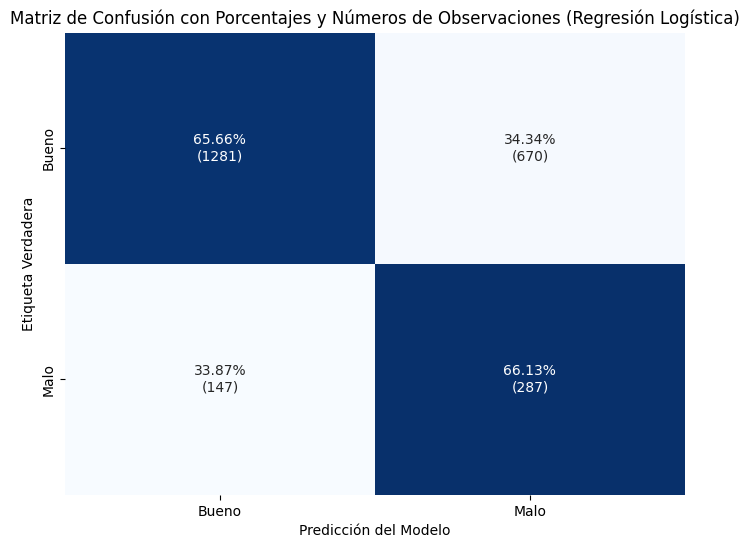

In [ ]:
# Generar la matriz de confusión con los datos de prueba
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage = cm_logistic.astype('float') / cm_logistic.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión, incluyendo tanto los porcentajes como el número de observaciones
cm_with_counts = np.empty_like(cm_logistic, dtype=object)
for i in range(cm_logistic.shape[0]):
    for j in range(cm_logistic.shape[1]):
        cm_with_counts[i, j] = f"{cm_percentage[i, j]:.2%}\n({cm_logistic[i, j]})"

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=cm_with_counts, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Bueno', 'Malo'], yticklabels=['Bueno', 'Malo'])
plt.title("Matriz de Confusión con Porcentajes y Números de Observaciones (Regresión Logística)")
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Predicción del Modelo')
plt.show()

In [ ]:
# Definir una función para verificar si la diagonal principal cumple con el criterio >= 60%
def check_diagonal_60(cm):
    bueno_bueno = cm[0, 0] / cm[0].sum()  # Bueno (Verdadero) y Bueno (Predicho)
    malo_malo = cm[1, 1] / cm[1].sum()    # Malo (Verdadero) y Malo (Predicho)
    return bueno_bueno >= 0.60 and malo_malo >= 0.60

# Definir el modelo de regresión logística
logistic_regression = LogisticRegression(random_state=123, class_weight='balanced', max_iter=5000)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controla la regularización
    'solver': ['lbfgs', 'liblinear'],  # Solvers a probar
}

# Definir la búsqueda en cuadrícula con validación cruzada
grid_search_logistic = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search_logistic.fit(X_train_scaled, y_train)

# Obtener el mejor modelo encontrado
best_logistic_model = grid_search_logistic.best_estimator_

# Probar diferentes umbrales de decisión para encontrar uno que satisfaga el criterio >=60%
optimal_threshold = 0.5
y_pred_proba = best_logistic_model.predict_proba(X_test_scaled)[:, 1]  # Predicciones probabilísticas

for threshold in np.arange(0.3, 0.7, 0.01):  # Probar desde 0.3 a 0.7 con saltos de 0.01
    # Ajustar el umbral de decisión
    y_pred_logistic_tuned = np.where(y_pred_proba >= threshold, 1, 0)

    # Generar la matriz de confusión
    cm_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)

    # Verificar si la diagonal principal cumple con el criterio >=60%
    if check_diagonal_60(cm_logistic_tuned):
        optimal_threshold = threshold
        break

# Calcular la matriz de confusión final con el umbral óptimo
y_pred_final = np.where(y_pred_proba >= optimal_threshold, 1, 0)
cm_final = confusion_matrix(y_test, y_pred_final)

# Calcular los porcentajes por fila (normalizar por fila)
cm_percentage_final = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis]

# Crear un DataFrame con la matriz de confusión final
cm_with_counts_final = pd.DataFrame(index=['Bueno (Verdadero)', 'Malo (Verdadero)'],
                                    columns=['Bueno (Predicho)', 'Malo (Predicho)'])

# Rellenar la matriz con porcentajes y números de observaciones
for i in range(cm_final.shape[0]):
    for j in range(cm_final.shape[1]):
        cm_with_counts_final.iloc[i, j] = f"{cm_percentage_final[i, j]:.2%} ({cm_final[i, j]})"

# Mostrar la matriz de confusión final
print("\nMatriz de Confusión final ajustada con umbral óptimo:")
print(cm_with_counts_final)

# Mostrar el umbral óptimo encontrado y los mejores hiperparámetros
print(f"\nUmbral óptimo encontrado: {optimal_threshold}")
print(f"Mejores hiperparámetros encontrados: {grid_search_logistic.best_params_}")


Matriz de Confusión final ajustada con umbral óptimo:
                  Bueno (Predicho) Malo (Predicho)
Bueno (Verdadero)    60.48% (1180)    39.52% (771)
Malo (Verdadero)      29.26% (127)    70.74% (307)

Umbral óptimo encontrado: 0.47000000000000014
Mejores hiperparámetros encontrados: {'C': 10, 'solver': 'lbfgs'}


In [ ]:
target_names = ['0-Bueno', '1-Malo']

# Imprimir el reporte de clasificación con los nombres de las clases
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     0-Bueno       0.89      0.65      0.75      1951
      1-Malo       0.29      0.64      0.40       434

    accuracy                           0.65      2385
   macro avg       0.59      0.64      0.57      2385
weighted avg       0.78      0.65      0.69      2385

